<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Analise_de_Algoritmos_e_Estrutura_de_Dados/blob/main/Wagner_LopesCardozo_aula9Pr%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

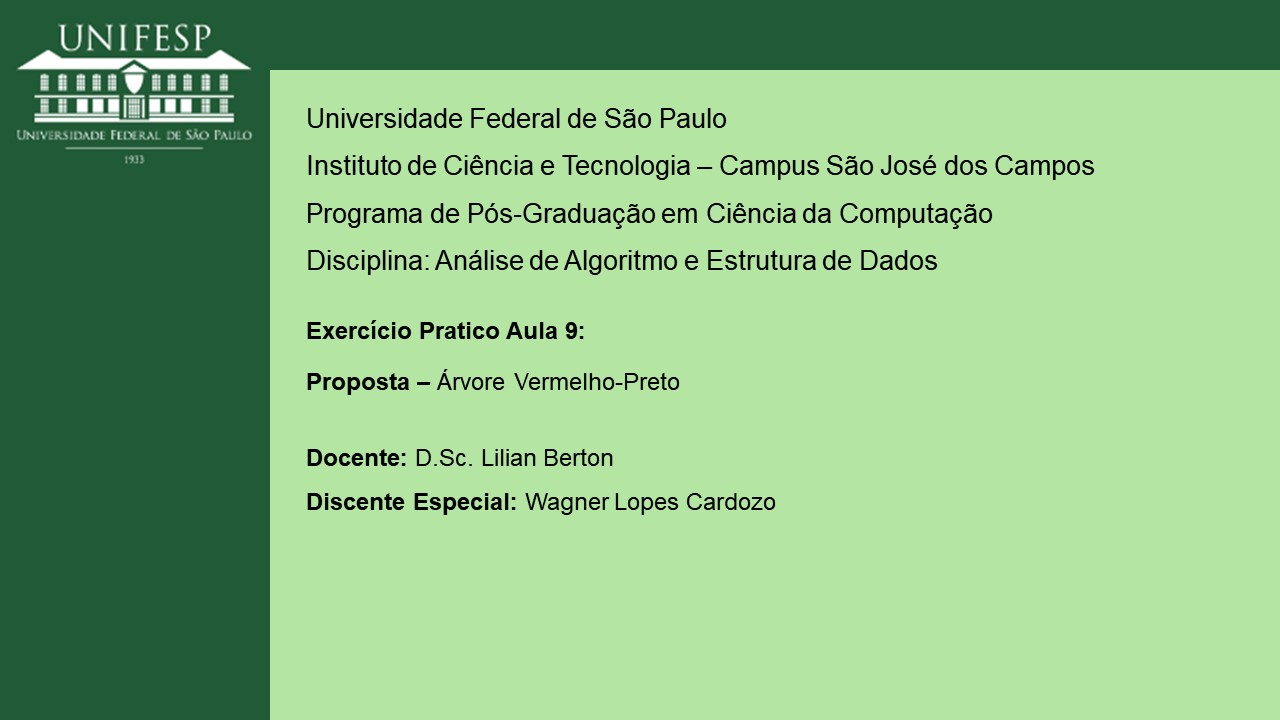

#<font color=lightgreen>Este algoritmo tem implementado a estrutura de dados Árvore Vermelho-Preto juntamente com as estruturas de dados Árvore Binária Comum e Árvore AVL com a comparação dos tempos de inserção do vetor aleatório e ordenação deste vetor de 100.000 elementos e tempos de busca do elemento 50 e 50.000 neste vetor mesmo não encontrando o elemento. No algoritmo também e feito o cálculo das alturas h das subárvores esquerda e direita para as estruturas de dados.

In [ ]:
import random
import time
from tabulate import tabulate

# Classe para o nó da árvore binária e AVL
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Usado apenas para AVL e vermelho-preto
        self.color = "red"  # Usado apenas para árvore vermelho-preto

# Implementação da Árvore Binária de Busca (BST)
class BinarySearchTree:
    def insert(self, root, value):
        if not root:
            return Node(value)
        elif value < root.value:
            root.left = self.insert(root.left, value)
        else:
            root.right = self.insert(root.right, value)
        return root

    def search(self, root, value):
        if not root or root.value == value:
            return root is not None
        if value < root.value:
            return self.search(root.left, value)
        return self.search(root.right, value)

    def height(self, node):
        if not node:
            return 0
        return max(self.height(node.left), self.height(node.right)) + 1

# Implementação da Árvore AVL
class AVLTree:
    def get_height(self, node):
        if not node:
            return 0
        return node.height

    def update_height(self, node):
        node.height = 1 + max(self.get_height(node.left), self.get_height(node.right))

    def rotate_right(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x

    def rotate_left(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self.update_height(x)
        self.update_height(y)
        return y

    def get_balance(self, node):
        if not node:
            return 0
        return self.get_height(node.left) - self.get_height(node.right)

    def insert(self, root, value):
        if not root:
            return Node(value)
        elif value < root.value:
            root.left = self.insert(root.left, value)
        else:
            root.right = self.insert(root.right, value)

        self.update_height(root)
        balance = self.get_balance(root)

        if balance > 1 and value < root.left.value:
            return self.rotate_right(root)
        if balance < -1 and value > root.right.value:
            return self.rotate_left(root)
        if balance > 1 and value > root.left.value:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        if balance < -1 and value < root.right.value:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)

        return root

    def search(self, root, value):
        if not root or root.value == value:
            return root is not None
        if value < root.value:
            return self.search(root.left, value)
        return self.search(root.right, value)

# Implementação da Árvore Vermelho-Preto
class RedBlackTree:
    def __init__(self):
        self.NIL = Node(0)
        self.NIL.color = "black"
        self.root = self.NIL

    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        if x.right != self.NIL:
            x.right.parent = y
        x.parent = y.parent
        if y.parent == None:
            self.root = x
        elif y == y.parent.left:
            y.parent.left = x
        else:
            y.parent.right = x
        x.right = y
        y.parent = x

    def insert(self, key):
        node = Node(key)
        node.parent = None
        node.value = key
        node.left = self.NIL
        node.right = self.NIL
        node.color = "red"

        y = None
        x = self.root

        while x != self.NIL:
            y = x
            if node.value < x.value:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y == None:
            self.root = node
        elif node.value < y.value:
            y.left = node
        else:
            y.right = node

        if node.parent == None:
            node.color = "black"
            return

        if node.parent.parent == None:
            return

        self.fix_insert(node)

    def fix_insert(self, k):
        while k.parent.color == "red":
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == "red":
                    u.color = "black"
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.rotate_right(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.rotate_left(k.parent.parent)
            else:
                u = k.parent.parent.right
                if u.color == "red":
                    u.color = "black"
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.rotate_left(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.rotate_right(k.parent.parent)
            if k == self.root:
                break
        self.root.color = "black"

    def search(self, node, key):
        if node == self.NIL or key == node.value:
            return node != self.NIL
        if key < node.value:
            return self.search(node.left, key)
        return self.search(node.right, key)

    def height(self, node):
        if node == self.NIL:
            return 0
        return max(self.height(node.left), self.height(node.right)) + 1

# Função de busca binária
def binary_search(arr, x):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == x:
            return True
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
    return False

# Código principal com inserção, busca e medição de tempo para as estruturas de dados
n = 100000
random_vector = random.sample(range(1, 1000000), n)
element_50 = 50
element_50000 = 50000

#*********************

# Medição de tempo para vetor ordenado
start_time = time.time()
sorted_vector = sorted(random_vector)
sorted_vector_insertion_time = time.time() - start_time

# Inserção e busca nas estruturas
# Vetor de dados aleatórios
start_time = time.time()
found_50 = element_50 in random_vector
random_search_50_time = time.time() - start_time

start_time = time.time()
found_50000 = element_50000 in random_vector
random_search_50000_time = time.time() - start_time

# Vetor ordenado para busca binária
start_time = time.time()
found_50 = binary_search(sorted_vector, element_50)
sorted_search_50_time = time.time() - start_time

start_time = time.time()
found_50000 = binary_search(sorted_vector, element_50000)
sorted_search_50000_time = time.time() - start_time

# Árvore Binária Comum
bst = BinarySearchTree()
bst_root = None
start_time = time.time()
for value in random_vector:
    bst_root = bst.insert(bst_root, value)
bst_insertion_time = time.time() - start_time

start_time = time.time()
found_50 = bst.search(bst_root, element_50)
bst_search_50_time = time.time() - start_time

start_time = time.time()
found_50000 = bst.search(bst_root, element_50000)
bst_search_50000_time = time.time() - start_time

bst_left_height = bst.height(bst_root.left)
bst_right_height = bst.height(bst_root.right)

# Árvore AVL
avl = AVLTree()
avl_root = None
start_time = time.time()
for value in random_vector:
    avl_root = avl.insert(avl_root, value)
avl_insertion_time = time.time() - start_time

start_time = time.time()
found_50 = avl.search(avl_root, element_50)
avl_search_50_time = time.time() - start_time

start_time = time.time()
found_50000 = avl.search(avl_root, element_50000)
avl_search_50000_time = time.time() - start_time

avl_left_height = avl.get_height(avl_root.left)
avl_right_height = avl.get_height(avl_root.right)


#********************************************************

# Árvore Vermelho-Preto
rb_tree = RedBlackTree()
start_time = time.time()
for value in random_vector:
    rb_tree.insert(value)
rb_insertion_time = time.time() - start_time

start_time = time.time()
found_50 = rb_tree.search(rb_tree.root, element_50)
rb_search_50_time = time.time() - start_time

start_time = time.time()
found_50000 = rb_tree.search(rb_tree.root, element_50000)
rb_search_50000_time = time.time() - start_time

rb_left_height = rb_tree.height(rb_tree.root.left)
rb_right_height = rb_tree.height(rb_tree.root.right)


#**********************************************************

# Exibição dos resultados
headers_main = [
    "Estrutura de Dados",
    "Tempo Inserção dos 100.000 elementos (s)",
    "Tempo de Busca do elemento 50 (s)",
    "Tempo de Busca do Elemento 50.000 (s)"
]
table_main = [
    ["Vetor de Dados Aleatórios", "-", random_search_50_time, random_search_50000_time],
    ["Vetor Ordenado Para Busca Binária", sorted_vector_insertion_time, sorted_search_50_time, sorted_search_50000_time],
    ["Árvore Binária Comum", bst_insertion_time, bst_search_50_time, bst_search_50000_time],
    ["Árvore AVL", avl_insertion_time, avl_search_50_time, avl_search_50000_time]
]

headers_height = ["Estrutura de Dados", "Altura Subárvore Esquerda", "Altura Subárvore Direita"]
table_height = [
    ["Árvore Binária Comum", bst_left_height, bst_right_height],
    ["Árvore AVL", avl_left_height, avl_right_height]
]

# Exibição das tabelas e da mensagem final
print(tabulate(table_main, headers=headers_main, tablefmt="grid"))
print("\nElementos 50 e 50.000 não encontrados\n")
print(tabulate(table_height, headers=headers_height, tablefmt="grid"))
print("\nMuito Obrigado e Bons Estudos")

#*******************************************************************************************************************

# Resultados
headers_main = [
    "Estrutura de Dados",
    "Tempo Inserção dos 100.000 elementos (s)",
    "Tempo de Busca do elemento 50 (s)",
    "Tempo de Busca do Elemento 50.000 (s)"
]
table_main = [
    ["Árvore Vermelho-Preto", rb_insertion_time, rb_search_50_time, rb_search_50000_time]
]

headers_height = ["Estrutura de Dados", "Altura Subárvore Esquerda", "Altura Subárvore Direita"]
table_height = [
    ["Árvore Vermelho-Preto", rb_left_height, rb_right_height]
]

# Exibição
print(tabulate(table_main, headers=headers_main, tablefmt="grid"))
print(tabulate(table_height, headers=headers_height, tablefmt="grid"))
print("\nMuito Obrigado e Bons Estudos")


+-----------------------------------+--------------------------------------------+-------------------------------------+-----------------------------------------+
| Estrutura de Dados                | Tempo Inserção dos 100.000 elementos (s)   |   Tempo de Busca do elemento 50 (s) |   Tempo de Busca do Elemento 50.000 (s) |
+===================================+============================================+=====================================+=========================================+
| Vetor de Dados Aleatórios         | -                                          |                         0.00925183  |                             0.0104916   |
+-----------------------------------+--------------------------------------------+-------------------------------------+-----------------------------------------+
| Vetor Ordenado Para Busca Binária | 0.07983732223510742                        |                         0.000123024 |                             0.000107765 |
+---------------------

#<font color=lightgreen>Este algoritmo é o mesmo acima porém com a união em uma única tabela dos tempos e alturas h.

In [ ]:
import random
import time
from tabulate import tabulate

# Classe para o nó da árvore binária e AVL
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Usado apenas para AVL e vermelho-preto
        self.color = "red"  # Usado apenas para árvore vermelho-preto

# Implementação da Árvore Binária de Busca (BST)
class BinarySearchTree:
    def insert(self, root, value):
        if not root:
            return Node(value)
        elif value < root.value:
            root.left = self.insert(root.left, value)
        else:
            root.right = self.insert(root.right, value)
        return root

    def search(self, root, value):
        if not root or root.value == value:
            return root is not None
        if value < root.value:
            return self.search(root.left, value)
        return self.search(root.right, value)

    def height(self, node):
        if not node:
            return 0
        return max(self.height(node.left), self.height(node.right)) + 1

# Implementação da Árvore AVL
class AVLTree:
    def get_height(self, node):
        if not node:
            return 0
        return node.height

    def update_height(self, node):
        node.height = 1 + max(self.get_height(node.left), self.get_height(node.right))

    def rotate_right(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x

    def rotate_left(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self.update_height(x)
        self.update_height(y)
        return y

    def get_balance(self, node):
        if not node:
            return 0
        return self.get_height(node.left) - self.get_height(node.right)

    def insert(self, root, value):
        if not root:
            return Node(value)
        elif value < root.value:
            root.left = self.insert(root.left, value)
        else:
            root.right = self.insert(root.right, value)

        self.update_height(root)
        balance = self.get_balance(root)

        if balance > 1 and value < root.left.value:
            return self.rotate_right(root)
        if balance < -1 and value > root.right.value:
            return self.rotate_left(root)
        if balance > 1 and value > root.left.value:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        if balance < -1 and value < root.right.value:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)

        return root

    def search(self, root, value):
        if not root or root.value == value:
            return root is not None
        if value < root.value:
            return self.search(root.left, value)
        return self.search(root.right, value)

# Implementação da Árvore Vermelho-Preto
class RedBlackTree:
    def __init__(self):
        self.NIL = Node(0)
        self.NIL.color = "black"
        self.root = self.NIL

    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        if x.right != self.NIL:
            x.right.parent = y
        x.parent = y.parent
        if y.parent == None:
            self.root = x
        elif y == y.parent.left:
            y.parent.left = x
        else:
            y.parent.right = x
        x.right = y
        y.parent = x

    def insert(self, key):
        node = Node(key)
        node.parent = None
        node.value = key
        node.left = self.NIL
        node.right = self.NIL
        node.color = "red"

        y = None
        x = self.root

        while x != self.NIL:
            y = x
            if node.value < x.value:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y == None:
            self.root = node
        elif node.value < y.value:
            y.left = node
        else:
            y.right = node

        if node.parent == None:
            node.color = "black"
            return

        if node.parent.parent == None:
            return

        self.fix_insert(node)

    def fix_insert(self, k):
        while k.parent.color == "red":
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == "red":
                    u.color = "black"
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.rotate_right(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.rotate_left(k.parent.parent)
            else:
                u = k.parent.parent.right
                if u.color == "red":
                    u.color = "black"
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.rotate_left(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.rotate_right(k.parent.parent)
            if k == self.root:
                break
        self.root.color = "black"

    def search(self, node, key):
        if node == self.NIL or key == node.value:
            return node != self.NIL
        if key < node.value:
            return self.search(node.left, key)
        return self.search(node.right, key)

    def height(self, node):
        if node == self.NIL:
            return 0
        return max(self.height(node.left), self.height(node.right)) + 1

# Função de busca binária
def binary_search(arr, x):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == x:
            return True
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
    return False

# Código principal com inserção, busca e medição de tempo para as estruturas de dados
n = 100000
random_vector = random.sample(range(1, 1000000), n)
element_50 = 50
element_50000 = 50000

#*******************************************************************************************

# Medição de tempo para vetor ordenado
start_time = time.time()
sorted_vector = sorted(random_vector)
sorted_vector_insertion_time = time.time() - start_time

# Inserção e busca nas estruturas
# Vetor de dados aleatórios
start_time = time.time()
found_50 = element_50 in random_vector
random_search_50_time = time.time() - start_time

start_time = time.time()
found_50000 = element_50000 in random_vector
random_search_50000_time = time.time() - start_time

# Vetor ordenado para busca binária
start_time = time.time()
found_50 = binary_search(sorted_vector, element_50)
sorted_search_50_time = time.time() - start_time

start_time = time.time()
found_50000 = binary_search(sorted_vector, element_50000)
sorted_search_50000_time = time.time() - start_time

# Árvore Binária Comum
bst = BinarySearchTree()
bst_root = None
start_time = time.time()
for value in random_vector:
    bst_root = bst.insert(bst_root, value)
bst_insertion_time = time.time() - start_time

start_time = time.time()
found_50 = bst.search(bst_root, element_50)
bst_search_50_time = time.time() - start_time

start_time = time.time()
found_50000 = bst.search(bst_root, element_50000)
bst_search_50000_time = time.time() - start_time

bst_left_height = bst.height(bst_root.left)
bst_right_height = bst.height(bst_root.right)

# Árvore AVL
avl = AVLTree()
avl_root = None
start_time = time.time()
for value in random_vector:
    avl_root = avl.insert(avl_root, value)
avl_insertion_time = time.time() - start_time

start_time = time.time()
found_50 = avl.search(avl_root, element_50)
avl_search_50_time = time.time() - start_time

start_time = time.time()
found_50000 = avl.search(avl_root, element_50000)
avl_search_50000_time = time.time() - start_time

avl_left_height = avl.get_height(avl_root.left)
avl_right_height = avl.get_height(avl_root.right)


#*************************************************************************************************8

# Árvore Vermelho-Preto
rb_tree = RedBlackTree()
start_time = time.time()
for value in random_vector:
    rb_tree.insert(value)
rb_insertion_time = time.time() - start_time

start_time = time.time()
found_50 = rb_tree.search(rb_tree.root, element_50)
rb_search_50_time = time.time() - start_time

start_time = time.time()
found_50000 = rb_tree.search(rb_tree.root, element_50000)
rb_search_50000_time = time.time() - start_time

rb_left_height = rb_tree.height(rb_tree.root.left)
rb_right_height = rb_tree.height(rb_tree.root.right)


#**********************************************************

# Exibição dos resultados
headers_main = [
    "Estrutura de Dados",
    "Tempo Inserção dos 100.000 elementos (s)",
    "Tempo de Busca do elemento 50 (s)",
    "Tempo de Busca do Elemento 50.000 (s)"
]
table_main = [
    ["Vetor de Dados Aleatórios", "-", random_search_50_time, random_search_50000_time],
    ["Vetor Ordenado Para Busca Binária", sorted_vector_insertion_time, sorted_search_50_time, sorted_search_50000_time],
    ["Árvore Binária Comum", bst_insertion_time, bst_search_50_time, bst_search_50000_time],
    ["Árvore AVL", avl_insertion_time, avl_search_50_time, avl_search_50000_time],
    ["Árvore Vermelho-Preto", rb_insertion_time, rb_search_50_time, rb_search_50000_time]
]

headers_height = ["Estrutura de Dados", "Altura Subárvore Esquerda", "Altura Subárvore Direita"]
table_height = [
    ["Árvore Binária Comum", bst_left_height, bst_right_height],
    ["Árvore AVL", avl_left_height, avl_right_height],
    ["Árvore Vermelho-Preto", rb_left_height, rb_right_height]
]

# Exibição das tabelas e da mensagem final
print(tabulate(table_main, headers=headers_main, tablefmt="grid"))
print("\nElementos 50 e 50.000 não encontrados\n")
print(tabulate(table_height, headers=headers_height, tablefmt="grid"))
print("\nMuito Obrigado e Bons Estudos")

#*******************************************************************************************************************

# Resultados
#headers_main = [
    #"Estrutura de Dados",
    #"Tempo Inserção dos 100.000 elementos (s)",
    #"Tempo de Busca do elemento 50 (s)",
    #"Tempo de Busca do Elemento 50.000 (s)"
#]
#table_main = [
    #["Árvore Vermelho-Preto", rb_insertion_time, rb_search_50_time, rb_search_50000_time]
#]

#headers_height = ["Estrutura de Dados", "Altura Subárvore Esquerda", "Altura Subárvore Direita"]
#table_height = [
    #["Árvore Vermelho-Preto", rb_left_height, rb_right_height]
#]

# Exibição
#print(tabulate(table_main, headers=headers_main, tablefmt="grid"))
#print(tabulate(table_height, headers=headers_height, tablefmt="grid"))
#print("\nMuito Obrigado e Bons Estudos")

+-----------------------------------+--------------------------------------------+-------------------------------------+-----------------------------------------+
| Estrutura de Dados                | Tempo Inserção dos 100.000 elementos (s)   |   Tempo de Busca do elemento 50 (s) |   Tempo de Busca do Elemento 50.000 (s) |
+===================================+============================================+=====================================+=========================================+
| Vetor de Dados Aleatórios         | -                                          |                         0.00609875  |                             0.00695658  |
+-----------------------------------+--------------------------------------------+-------------------------------------+-----------------------------------------+
| Vetor Ordenado Para Busca Binária | 0.05457305908203125                        |                         8.32081e-05 |                             6.31809e-05 |
+---------------------

#<font color=lightgreen>Neste algoritmo é executado 5 vezes todas as estruturas de dados e feito o cálculo das médias para os tempos e alturas h.

In [ ]:
import random
import time
from tabulate import tabulate

# Classe para o nó das árvores binária, AVL e vermelho-preto
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Usado para AVL e vermelho-preto
        self.color = "red"  # Usado para árvore vermelho-preto

# Implementação da Árvore Binária de Busca (BST)
class BinarySearchTree:
    def insert(self, root, value):
        if not root:
            return Node(value)
        elif value < root.value:
            root.left = self.insert(root.left, value)
        else:
            root.right = self.insert(root.right, value)
        return root

    def search(self, root, value):
        if not root or root.value == value:
            return root is not None
        if value < root.value:
            return self.search(root.left, value)
        return self.search(root.right, value)

    def height(self, node):
        if not node:
            return 0
        return max(self.height(node.left), self.height(node.right)) + 1

# Implementação da Árvore AVL
class AVLTree:
    def get_height(self, node):
        return 0 if not node else node.height

    def update_height(self, node):
        node.height = 1 + max(self.get_height(node.left), self.get_height(node.right))

    def rotate_right(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x

    def rotate_left(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self.update_height(x)
        self.update_height(y)
        return y

    def get_balance(self, node):
        return 0 if not node else self.get_height(node.left) - self.get_height(node.right)

    def insert(self, root, value):
        if not root:
            return Node(value)
        elif value < root.value:
            root.left = self.insert(root.left, value)
        else:
            root.right = self.insert(root.right, value)

        self.update_height(root)
        balance = self.get_balance(root)

        if balance > 1 and value < root.left.value:
            return self.rotate_right(root)
        if balance < -1 and value > root.right.value:
            return self.rotate_left(root)
        if balance > 1 and value > root.left.value:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        if balance < -1 and value < root.right.value:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)

        return root

    def search(self, root, value):
        if not root or root.value == value:
            return root is not None
        if value < root.value:
            return self.search(root.left, value)
        return self.search(root.right, value)

# Implementação da Árvore Vermelho-Preto
class RedBlackTree:
    def __init__(self):
        self.NIL = Node(0)
        self.NIL.color = "black"
        self.root = self.NIL

    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        if x.right != self.NIL:
            x.right.parent = y
        x.parent = y.parent
        if y.parent is None:
            self.root = x
        elif y == y.parent.left:
            y.parent.left = x
        else:
            y.parent.right = x
        x.right = y
        y.parent = x

    def insert(self, key):
        node = Node(key)
        node.parent = None
        node.value = key
        node.left = self.NIL
        node.right = self.NIL
        node.color = "red"

        y = None
        x = self.root

        while x != self.NIL:
            y = x
            if node.value < x.value:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y is None:
            self.root = node
        elif node.value < y.value:
            y.left = node
        else:
            y.right = node

        if node.parent is None:
            node.color = "black"
            return

        if node.parent.parent is None:
            return

        self.fix_insert(node)

    def fix_insert(self, k):
        while k.parent.color == "red":
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == "red":
                    u.color = "black"
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.rotate_right(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.rotate_left(k.parent.parent)
            else:
                u = k.parent.parent.right
                if u.color == "red":
                    u.color = "black"
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.rotate_left(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.rotate_right(k.parent.parent)
            if k == self.root:
                break
        self.root.color = "black"

    def search(self, node, key):
        if node == self.NIL or key == node.value:
            return node != self.NIL
        if key < node.value:
            return self.search(node.left, key)
        return self.search(node.right, key)

    def height(self, node):
        return 0 if node == self.NIL else max(self.height(node.left), self.height(node.right)) + 1

# Função de busca binária
def binary_search(arr, x):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == x:
            return True
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
    return False

# Configurações principais
n = 100000
element_50, element_50000 = 50, 50000
executions = 5

def run_measurements():
    # Listas para armazenar os resultados de cada execução
    insertion_times, search_times_50, search_times_50000 = { }, { }, { }
    heights_left, heights_right = { }, { }
    for structure in ["BST", "AVL", "RB"]:
        insertion_times[structure] = []
        search_times_50[structure] = []
        search_times_50000[structure] = []
        heights_left[structure] = []
        heights_right[structure] = []

    # Executar cada estrutura cinco vezes
    for _ in range(executions):
        # Vetor de dados aleatórios
        random_vector = random.sample(range(1, 1000000), n)
        sorted_vector = sorted(random_vector)

        # BST
        bst = BinarySearchTree()
        bst_root = None
        start_time = time.time()
        for value in random_vector:
            bst_root = bst.insert(bst_root, value)
        insertion_times["BST"].append(time.time() - start_time)

        start_time = time.time()
        bst.search(bst_root, element_50)
        search_times_50["BST"].append(time.time() - start_time)

        start_time = time.time()
        bst.search(bst_root, element_50000)
        search_times_50000["BST"].append(time.time() - start_time)

        heights_left["BST"].append(bst.height(bst_root.left))
        heights_right["BST"].append(bst.height(bst_root.right))

        # AVL
        avl = AVLTree()
        avl_root = None
        start_time = time.time()
        for value in random_vector:
            avl_root = avl.insert(avl_root, value)
        insertion_times["AVL"].append(time.time() - start_time)

        start_time = time.time()
        avl.search(avl_root, element_50)
        search_times_50["AVL"].append(time.time() - start_time)

        start_time = time.time()
        avl.search(avl_root, element_50000)
        search_times_50000["AVL"].append(time.time() - start_time)

        heights_left["AVL"].append(avl.get_height(avl_root.left))
        heights_right["AVL"].append(avl.get_height(avl_root.right))

        # Red-Black
        rbt = RedBlackTree()
        start_time = time.time()
        for value in random_vector:
            rbt.insert(value)
        insertion_times["RB"].append(time.time() - start_time)

        start_time = time.time()
        rbt.search(rbt.root, element_50)
        search_times_50["RB"].append(time.time() - start_time)

        start_time = time.time()
        rbt.search(rbt.root, element_50000)
        search_times_50000["RB"].append(time.time() - start_time)

        heights_left["RB"].append(rbt.height(rbt.root.left))
        heights_right["RB"].append(rbt.height(rbt.root.right))

    # Calcular médias
    avg_insertion_times = {key: sum(val) / executions for key, val in insertion_times.items()}
    avg_search_times_50 = {key: sum(val) / executions for key, val in search_times_50.items()}
    avg_search_times_50000 = {key: sum(val) / executions for key, val in search_times_50000.items()}
    avg_heights_left = {key: sum(val) / executions for key, val in heights_left.items()}
    avg_heights_right = {key: sum(val) / executions for key, val in heights_right.items()}

    # Exibir resultados
    print("Médias de Tempo de Inserção:")
    print(tabulate(avg_insertion_times.items(), headers=["Estrutura", "Tempo (segundos)"]))

    print("\nMédias de Tempo de Busca para 50:")
    print(tabulate(avg_search_times_50.items(), headers=["Estrutura", "Tempo (segundos)"]))

    print("\nMédias de Tempo de Busca para 50000:")
    print(tabulate(avg_search_times_50000.items(), headers=["Estrutura", "Tempo (segundos)"]))

    print("\nAltura Média da Subárvore à Esquerda:")
    print(tabulate(avg_heights_left.items(), headers=["Estrutura", "Altura"]))

    print("\nAltura Média da Subárvore à Direita:")
    print(tabulate(avg_heights_right.items(), headers=["Estrutura", "Altura"]))

if __name__ == "__main__":
    run_measurements()


Médias de Tempo de Inserção:
Estrutura      Tempo (segundos)
-----------  ------------------
BST                     2.4601
AVL                     4.40118
RB                      1.66414

Médias de Tempo de Busca para 50:
Estrutura      Tempo (segundos)
-----------  ------------------
BST                 1.33038e-05
AVL                 1.50204e-05
RB                  2.63214e-05

Médias de Tempo de Busca para 50000:
Estrutura      Tempo (segundos)
-----------  ------------------
BST                 1.36852e-05
AVL                 1.37329e-05
RB                  1.44958e-05

Altura Média da Subárvore à Esquerda:
Estrutura      Altura
-----------  --------
BST              37.8
AVL              18.6
RB               19

Altura Média da Subárvore à Direita:
Estrutura      Altura
-----------  --------
BST              37
AVL              18.8
RB               18.8


#<font color=lightgreen>O mesmo algoritmo acima executado 20 vezes para as estruturas de dados.

In [ ]:

import time
from tabulate import tabulate

# Classe para o nó das árvores binária, AVL e vermelho-preto
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Usado para AVL e vermelho-preto
        self.color = "red"  # Usado para árvore vermelho-preto

# Implementação da Árvore Binária de Busca (BST)
class BinarySearchTree:
    def insert(self, root, value):
        if not root:
            return Node(value)
        elif value < root.value:
            root.left = self.insert(root.left, value)
        else:
            root.right = self.insert(root.right, value)
        return root

    def search(self, root, value):
        if not root or root.value == value:
            return root is not None
        if value < root.value:
            return self.search(root.left, value)
        return self.search(root.right, value)

    def height(self, node):
        if not node:
            return 0
        return max(self.height(node.left), self.height(node.right)) + 1

# Implementação da Árvore AVL
class AVLTree:
    def get_height(self, node):
        return 0 if not node else node.height

    def update_height(self, node):
        node.height = 1 + max(self.get_height(node.left), self.get_height(node.right))

    def rotate_right(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x

    def rotate_left(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self.update_height(x)
        self.update_height(y)
        return y

    def get_balance(self, node):
        return 0 if not node else self.get_height(node.left) - self.get_height(node.right)

    def insert(self, root, value):
        if not root:
            return Node(value)
        elif value < root.value:
            root.left = self.insert(root.left, value)
        else:
            root.right = self.insert(root.right, value)

        self.update_height(root)
        balance = self.get_balance(root)

        if balance > 1 and value < root.left.value:
            return self.rotate_right(root)
        if balance < -1 and value > root.right.value:
            return self.rotate_left(root)
        if balance > 1 and value > root.left.value:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        if balance < -1 and value < root.right.value:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)

        return root

    def search(self, root, value):
        if not root or root.value == value:
            return root is not None
        if value < root.value:
            return self.search(root.left, value)
        return self.search(root.right, value)

# Implementação da Árvore Vermelho-Preto
class RedBlackTree:
    def __init__(self):
        self.NIL = Node(0)
        self.NIL.color = "black"
        self.root = self.NIL

    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        if x.right != self.NIL:
            x.right.parent = y
        x.parent = y.parent
        if y.parent is None:
            self.root = x
        elif y == y.parent.left:
            y.parent.left = x
        else:
            y.parent.right = x
        x.right = y
        y.parent = x

    def insert(self, key):
        node = Node(key)
        node.parent = None
        node.value = key
        node.left = self.NIL
        node.right = self.NIL
        node.color = "red"

        y = None
        x = self.root

        while x != self.NIL:
            y = x
            if node.value < x.value:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y is None:
            self.root = node
        elif node.value < y.value:
            y.left = node
        else:
            y.right = node

        if node.parent is None:
            node.color = "black"
            return

        if node.parent.parent is None:
            return

        self.fix_insert(node)

    def fix_insert(self, k):
        while k.parent.color == "red":
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == "red":
                    u.color = "black"
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.rotate_right(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.rotate_left(k.parent.parent)
            else:
                u = k.parent.parent.right
                if u.color == "red":
                    u.color = "black"
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.rotate_left(k)
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.rotate_right(k.parent.parent)
            if k == self.root:
                break
        self.root.color = "black"

    def search(self, node, key):
        if node == self.NIL or key == node.value:
            return node != self.NIL
        if key < node.value:
            return self.search(node.left, key)
        return self.search(node.right, key)

    def height(self, node):
        return 0 if node == self.NIL else max(self.height(node.left), self.height(node.right)) + 1

# Função de busca binária
def binary_search(arr, x):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == x:
            return True
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
    return False

# Configurações principais
n = 100000
element_50, element_50000 = 50, 50000
executions = 20

def run_measurements():
    # Listas para armazenar os resultados de cada execução
    insertion_times, search_times_50, search_times_50000 = { }, { }, { }
    heights_left, heights_right = { }, { }
    for structure in ["BST", "AVL", "RB"]:
        insertion_times[structure] = []
        search_times_50[structure] = []
        search_times_50000[structure] = []
        heights_left[structure] = []
        heights_right[structure] = []

    # Executar cada estrutura cinco vezes
    for _ in range(executions):
        # Vetor de dados aleatórios
        random_vector = random.sample(range(1, 1000000), n)
        sorted_vector = sorted(random_vector)

        # BST
        bst = BinarySearchTree()
        bst_root = None
        start_time = time.time()
        for value in random_vector:
            bst_root = bst.insert(bst_root, value)
        insertion_times["BST"].append(time.time() - start_time)

        start_time = time.time()
        bst.search(bst_root, element_50)
        search_times_50["BST"].append(time.time() - start_time)

        start_time = time.time()
        bst.search(bst_root, element_50000)
        search_times_50000["BST"].append(time.time() - start_time)

        heights_left["BST"].append(bst.height(bst_root.left))
        heights_right["BST"].append(bst.height(bst_root.right))

        # AVL
        avl = AVLTree()
        avl_root = None
        start_time = time.time()
        for value in random_vector:
            avl_root = avl.insert(avl_root, value)
        insertion_times["AVL"].append(time.time() - start_time)

        start_time = time.time()
        avl.search(avl_root, element_50)
        search_times_50["AVL"].append(time.time() - start_time)

        start_time = time.time()
        avl.search(avl_root, element_50000)
        search_times_50000["AVL"].append(time.time() - start_time)

        heights_left["AVL"].append(avl.get_height(avl_root.left))
        heights_right["AVL"].append(avl.get_height(avl_root.right))

        # Red-Black
        rbt = RedBlackTree()
        start_time = time.time()
        for value in random_vector:
            rbt.insert(value)
        insertion_times["RB"].append(time.time() - start_time)

        start_time = time.time()
        rbt.search(rbt.root, element_50)
        search_times_50["RB"].append(time.time() - start_time)

        start_time = time.time()
        rbt.search(rbt.root, element_50000)
        search_times_50000["RB"].append(time.time() - start_time)

        heights_left["RB"].append(rbt.height(rbt.root.left))
        heights_right["RB"].append(rbt.height(rbt.root.right))

    # Calcular médias
    avg_insertion_times = {key: sum(val) / executions for key, val in insertion_times.items()}
    avg_search_times_50 = {key: sum(val) / executions for key, val in search_times_50.items()}
    avg_search_times_50000 = {key: sum(val) / executions for key, val in search_times_50000.items()}
    avg_heights_left = {key: sum(val) / executions for key, val in heights_left.items()}
    avg_heights_right = {key: sum(val) / executions for key, val in heights_right.items()}

    # Exibir resultados
    print("Médias de Tempo de Inserção:")
    print(tabulate(avg_insertion_times.items(), headers=["Estrutura", "Tempo (segundos)"]))

    print("\nMédias de Tempo de Busca para 50:")
    print(tabulate(avg_search_times_50.items(), headers=["Estrutura", "Tempo (segundos)"]))

    print("\nMédias de Tempo de Busca para 50000:")
    print(tabulate(avg_search_times_50000.items(), headers=["Estrutura", "Tempo (segundos)"]))

    print("\nAltura Média da Subárvore à Esquerda:")
    print(tabulate(avg_heights_left.items(), headers=["Estrutura", "Altura"]))

    print("\nAltura Média da Subárvore à Direita:")
    print(tabulate(avg_heights_right.items(), headers=["Estrutura", "Altura"]))

if __name__ == "__main__":
    run_measurements()

Médias de Tempo de Inserção:
Estrutura      Tempo (segundos)
-----------  ------------------
BST                     2.35582
AVL                     4.49236
RB                      2.04507

Médias de Tempo de Busca para 50:
Estrutura      Tempo (segundos)
-----------  ------------------
BST                 1.37806e-05
AVL                 1.60456e-05
RB                  2.78234e-05

Médias de Tempo de Busca para 50000:
Estrutura      Tempo (segundos)
-----------  ------------------
BST                 1.72973e-05
AVL                 1.37448e-05
RB                  1.58668e-05

Altura Média da Subárvore à Esquerda:
Estrutura      Altura
-----------  --------
BST             36.3
AVL             18.8
RB              19.25

Altura Média da Subárvore à Direita:
Estrutura      Altura
-----------  --------
BST             35.65
AVL             18.6
RB              19


#<font color=lightgreen>ANEXO:

#<font color=lightgreen>Este algoritmo tem implementado a estrutura de dados Árvore Vermelho-Preto e permite ao usuário escolher as raízes do vetor e por fim gera a figura .png no processamento em nuvem do Google Colab com o arranjo da árvore gerada (algoritmo para tirar a prova da árvore gerada manualmente no exercício teórico da aula 9).

In [ ]:
import graphviz

# Definição da classe para os nós da árvore vermelho-preto
class RBNode:
    def __init__(self, value, color="red"):
        self.value = value
        self.color = color  # "red" ou "black"
        self.left = None
        self.right = None
        self.parent = None

# Classe para a árvore vermelho-preto
class RBTree:
    def __init__(self):
        self.NIL = RBNode(value=None, color="black")  # Nó sentinel
        self.root = self.NIL

    # Função para rotacionar à esquerda
    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent == self.NIL:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    # Função para rotacionar à direita
    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        if x.right != self.NIL:
            x.right.parent = y
        x.parent = y.parent
        if y.parent == self.NIL:
            self.root = x
        elif y == y.parent.right:
            y.parent.right = x
        else:
            y.parent.left = x
        x.right = y
        y.parent = x

    # Função para inserir um novo nó na árvore vermelho-preto
    def insert(self, value):
        new_node = RBNode(value)
        new_node.left = new_node.right = self.NIL
        parent = self.NIL
        current = self.root

        while current != self.NIL:
            parent = current
            if new_node.value < current.value:
                current = current.left
            else:
                current = current.right

        new_node.parent = parent
        if parent == self.NIL:
            self.root = new_node
        elif new_node.value < parent.value:
            parent.left = new_node
        else:
            parent.right = new_node

        new_node.color = "red"
        self.fix_insert(new_node)

    # Função para corrigir a árvore após a inserção
    def fix_insert(self, k):
        while k != self.root and k.parent.color == "red":
            if k.parent == k.parent.parent.left:
                u = k.parent.parent.right  # Tio
                if u.color == "red":
                    # Caso 1: Tio é vermelho
                    k.parent.color = "black"
                    u.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        # Caso 2: K é o filho direito
                        k = k.parent
                        self.rotate_left(k)
                    # Caso 3: K é o filho esquerdo
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.rotate_right(k.parent.parent)
            else:
                u = k.parent.parent.left  # Tio
                if u.color == "red":
                    # Caso 1: Tio é vermelho
                    k.parent.color = "black"
                    u.color = "black"
                    k.parent.parent.color = "red"
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        # Caso 2: K é o filho esquerdo
                        k = k.parent
                        self.rotate_right(k)
                    # Caso 3: K é o filho direito
                    k.parent.color = "black"
                    k.parent.parent.color = "red"
                    self.rotate_left(k.parent.parent)
        self.root.color = "black"

    # Função para encontrar o nó com o menor valor
    def min_value_node(self, node):
        current = node
        while current.left != self.NIL:
            current = current.left
        return current

    # Função para remover um nó da árvore vermelho-preto
    def remove(self, value):
        z = self.search(self.root, value)
        if z == self.NIL:
            return

        y = z
        y_original_color = y.color
        if z.left == self.NIL:
            x = z.right
            self.transplant(z, z.right)
        elif z.right == self.NIL:
            x = z.left
            self.transplant(z, z.left)
        else:
            y = self.min_value_node(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.transplant(y, y.right)
                y.right = z.right
                y.right.parent = y
            self.transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color

        if y_original_color == "black":
            self.fix_remove(x)

    # Função para substituir um nó na árvore
    def transplant(self, u, v):
        if u.parent == self.NIL:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    # Função para corrigir a árvore após a remoção
    def fix_remove(self, x):
        while x != self.root and x.color == "black":
            if x == x.parent.left:
                w = x.parent.right
                if w.color == "red":
                    w.color = "black"
                    x.parent.color = "red"
                    self.rotate_left(x.parent)
                    w = x.parent.right
                if w.left.color == "black" and w.right.color == "black":
                    w.color = "red"
                    x = x.parent
                else:
                    if w.right.color == "black":
                        w.left.color = "black"
                        w.color = "red"
                        self.rotate_right(w)
                        w = x.parent.right
                    w.color = x.parent.color
                    x.parent.color = "black"
                    w.right.color = "black"
                    self.rotate_left(x.parent)
                    x = self.root
            else:
                w = x.parent.left
                if w.color == "red":
                    w.color = "black"
                    x.parent.color = "red"
                    self.rotate_right(x.parent)
                    w = x.parent.left
                if w.right.color == "black" and w.left.color == "black":
                    w.color = "red"
                    x = x.parent
                else:
                    if w.left.color == "black":
                        w.right.color = "black"
                        w.color = "red"
                        self.rotate_left(w)
                        w = x.parent.left
                    w.color = x.parent.color
                    x.parent.color = "black"
                    w.left.color = "black"
                    self.rotate_right(x.parent)
                    x = self.root
        x.color = "black"

    # Função para buscar um nó na árvore
    def search(self, node, key):
        if node == self.NIL or key == node.value:
            return node
        if key < node.value:
            return self.search(node.left, key)
        return self.search(node.right, key)

    # Função para exportar a árvore para o formato Graphviz
    def export_tree_to_graphviz(self, tree_name):
        dot_file = f"{tree_name}.dot"
        with open(dot_file, "w") as f:
            f.write("digraph G {\n")
            f.write("  node [shape=circle];\n")  # Define a forma dos nós como círculos
            self._export_node_iteratively(self.root, f)
            f.write("}")

        # Renderizar a árvore usando Graphviz
        graph = graphviz.Source.from_file(dot_file)
        return graph

    # Função auxiliar para exportar os nós da árvore de forma iterativa
    def _export_node_iteratively(self, root, f):
        stack = [(root, None)]  # Pilha contendo tuplas (nó_atual, nó_pai)

        while stack:
            node, parent = stack.pop()
            if node != self.NIL:
                node_id = id(node)
                f.write(f'  {node_id} [label="{node.value} ({node.color})"];\n')  # Exibir cor do nó
                if parent:
                    f.write(f'  {id(parent)} -> {node_id};\n')
                stack.append((node.right, node))
                stack.append((node.left, node))


# Função principal para receber entradas do usuário
def main():
    rb_tree = RBTree()
    user_inputs = []

    print("Insira até 50 raízes para a árvore vermelho-preto. Digite 'sair' para encerrar.")

    for _ in range(50):
        user_input = input(f"Digite a raiz {_+1} (ou 'sair' para encerrar): ")
        if user_input.lower() == 'sair':
            break
        try:
            value = int(user_input)
            user_inputs.append(value)
            # Inserir na árvore vermelho-preto
            rb_tree.insert(value)
        except ValueError:
            print("Por favor, insira um número válido.")

    # Exibir as raízes inseridas
    print("Raízes inseridas:", user_inputs)

    # Gerar a representação gráfica da árvore
    graph = rb_tree.export_tree_to_graphviz("rb_tree")
    graph.render("rb_tree", format="png", cleanup=True)  # Gera a imagem da árvore

if __name__ == '__main__':
    main()


Insira até 50 raízes para a árvore vermelho-preto. Digite 'sair' para encerrar.
Digite a raiz 1 (ou 'sair' para encerrar): 41
Digite a raiz 2 (ou 'sair' para encerrar): 38
Digite a raiz 3 (ou 'sair' para encerrar): 31
Digite a raiz 4 (ou 'sair' para encerrar): 12
Digite a raiz 5 (ou 'sair' para encerrar): 19
Digite a raiz 6 (ou 'sair' para encerrar): 8
Digite a raiz 7 (ou 'sair' para encerrar): 50
Digite a raiz 8 (ou 'sair' para encerrar): 1
Digite a raiz 9 (ou 'sair' para encerrar): 100
Digite a raiz 10 (ou 'sair' para encerrar): 101
Digite a raiz 11 (ou 'sair' para encerrar): sair
Raízes inseridas: [41, 38, 31, 12, 19, 8, 50, 1, 100, 101]


#<font color=lightgreen>Este algoritmo tem implementado as estruturas de dados Árvore Binária Comum, Árvore AVL e Árvore Vermelho-Preto, permitindo ao usuário escolher a quantidade de raízes a serem colocadas aleatoriamente no vetor e gera a figura .png separadas para cada estrutura de dados (somente por curiosidade para ver o balanceamento visual das árvores com um número maior de raízes).

In [ ]:
import graphviz
import random  # Não se esqueça de importar a biblioteca random

# Classe para o nó da árvore binária
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Função para inserir em uma árvore binária
def insert_binary_tree(root, value):
    if root is None:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_binary_tree(root.left, value)
    else:
        root.right = insert_binary_tree(root.right, value)
    return root

# Função para exportar a árvore binária para Graphviz
def export_binary_tree_to_graphviz(root, dot=None):
    if dot is None:
        dot = graphviz.Digraph()
    if root is not None:
        dot.node(str(root.value), str(root.value))
        if root.left:
            dot.edge(str(root.value), str(root.left.value))
            export_binary_tree_to_graphviz(root.left, dot)
        if root.right:
            dot.edge(str(root.value), str(root.right.value))
            export_binary_tree_to_graphviz(root.right, dot)
    return dot

# Classe para o nó da árvore AVL
class AVLNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1

# Funções auxiliares para AVL
def get_height(node):
    return node.height if node else 0

def get_balance(node):
    return get_height(node.left) - get_height(node.right)

def rotate_right(y):
    x = y.left
    T2 = x.right
    x.right = y
    y.left = T2
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    return x

def rotate_left(x):
    y = x.right
    T2 = y.left
    y.left = x
    x.right = T2
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    return y

def insert_avl_tree(root, value):
    if root is None:
        return AVLNode(value)
    elif value < root.value:
        root.left = insert_avl_tree(root.left, value)
    else:
        root.right = insert_avl_tree(root.right, value)

    root.height = 1 + max(get_height(root.left), get_height(root.right))

    balance = get_balance(root)

    if balance > 1:
        if value < root.left.value:
            return rotate_right(root)
        else:
            root.left = rotate_left(root.left)
            return rotate_right(root)

    if balance < -1:
        if value > root.right.value:
            return rotate_left(root)
        else:
            root.right = rotate_right(root.right)
            return rotate_left(root)

    return root

# Função para exportar a árvore AVL para Graphviz
def export_avl_tree_to_graphviz(root, dot=None):
    if dot is None:
        dot = graphviz.Digraph()
    if root is not None:
        dot.node(str(root.value), str(root.value))
        if root.left:
            dot.edge(str(root.value), str(root.left.value))
            export_avl_tree_to_graphviz(root.left, dot)
        if root.right:
            dot.edge(str(root.value), str(root.right.value))
            export_avl_tree_to_graphviz(root.right, dot)
    return dot

# Classe para o nó da árvore vermelho-preto
class RBNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.color = 'red'

class RBTree:
    def __init__(self):
        self.NIL_LEAF = RBNode(None)
        self.NIL_LEAF.color = 'black'
        self.root = self.NIL_LEAF

    def insert(self, value):
        new_node = RBNode(value)
        new_node.left = self.NIL_LEAF
        new_node.right = self.NIL_LEAF
        self._insert(new_node)
        self._fix_insert(new_node)

    def _insert(self, node):
        current = self.root
        parent = None

        while current != self.NIL_LEAF:
            parent = current
            if node.value < current.value:
                current = current.left
            else:
                current = current.right

        node.parent = parent
        if parent is None:
            self.root = node
        elif node.value < parent.value:
            parent.left = node
        else:
            parent.right = node

    def _fix_insert(self, node):
        while node != self.root and node.parent.color == 'red':
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle.color == 'red':
                    node.parent.color = 'black'
                    uncle.color = 'black'
                    node.parent.parent.color = 'red'
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self._rotate_left(node)
                    node.parent.color = 'black'
                    node.parent.parent.color = 'red'
                    self._rotate_right(node.parent.parent)
            else:
                uncle = node.parent.parent.left
                if uncle.color == 'red':
                    node.parent.color = 'black'
                    uncle.color = 'black'
                    node.parent.parent.color = 'red'
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self._rotate_right(node)
                    node.parent.color = 'black'
                    node.parent.parent.color = 'red'
                    self._rotate_left(node.parent.parent)

        self.root.color = 'black'

    def _rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.NIL_LEAF:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def _rotate_right(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.NIL_LEAF:
            y.right.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

# Função para exportar a árvore vermelho-preto para Graphviz
def export_rb_tree_to_graphviz(tree, node, dot=None):
    if dot is None:
        dot = graphviz.Digraph()
    if node is not None and node != tree.NIL_LEAF:  # Referência ao nó NIL da árvore
        dot.node(str(node.value), str(node.value), color=node.color)
        if node.left != tree.NIL_LEAF:  # Verifica se o filho esquerdo não é nulo
            dot.edge(str(node.value), str(node.left.value))
            export_rb_tree_to_graphviz(tree, node.left, dot)
        if node.right != tree.NIL_LEAF:  # Verifica se o filho direito não é nulo
            dot.edge(str(node.value), str(node.right.value))
            export_rb_tree_to_graphviz(tree, node.right, dot)
    return dot

# Código principal
if __name__ == '__main__':
    while True:
        try:
            n = int(input("Quantos elementos deseja inserir na árvore (máx. 10.000): "))
            if n > 10000:
                print("Número excede 10.000, tente novamente.")
                continue

            values = random.sample(range(1, 100000), n)

            print("Inserindo na Árvore Binária:")
            root_bin = None
            for value in values:
                root_bin = insert_binary_tree(root_bin, value)
            bin_graph = export_binary_tree_to_graphviz(root_bin)
            bin_graph.render('binary_tree', format='png', cleanup=True)

            print("Inserindo na Árvore AVL:")
            root_avl = None
            for value in values:
                root_avl = insert_avl_tree(root_avl, value)
            avl_graph = export_avl_tree_to_graphviz(root_avl)
            avl_graph.render('avl_tree', format='png', cleanup=True)

            print("Inserindo na Árvore Vermelho-Preto:")
            rb_tree = RBTree()
            for value in values:
                rb_tree.insert(value)
            rb_graph = export_rb_tree_to_graphviz(rb_tree, rb_tree.root)  # Passando a árvore como argumento
            rb_graph.render('rb_tree', format='png', cleanup=True)

            print("Árvores geradas e salvas como arquivos PNG.")
            break
        except ValueError:
            print("Entrada inválida. Por favor, insira um número inteiro.")


Quantos elementos deseja inserir na árvore (máx. 10.000): 30
Inserindo na Árvore Binária:
Inserindo na Árvore AVL:
Inserindo na Árvore Vermelho-Preto:
Árvores geradas e salvas como arquivos PNG.


#<font color=red>**Observação**

##<font color=red>Conforme a Norma ABNT NBR ISO/IEC 42001:2024 de 18 de abril de 2024, que regulamenta a citação de fontes e conteúdos gerados por IA,

##<font color=red>Exemplo de citação:

##<font color=red>"Fonte: Gerada por: (nome da ferramenta de IA utilizada) e data de criação. Exemplo:

##<font color=red>Chat GPT, em 30 de abril de 2024."

#<font color=red>**Para Este Estudo:**

#<font color=red>**Alguns blocos de código neste estudo foi feito o uso de IA Chat GPT em outubro de 2024 para o auxílio de melhoria e otimização do bloco de código.**

#<font color=lightgreen>Recursos Computacionais

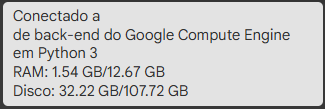

#<font color=lightgreen>Referência Bibliográfica

*	CORMEM, T. H., LEISERSON C. E., RIVEST R. L., STEIN C., Algoritmos Teoria e Prática – Gen LTC, 3ª Edição, 2012, ISBN-13: ‎ 978-8535236996

* NASCIMENTO, M. A., Red Black Tree (GitHub), https://github.com/MarcoNasc/red-black-tree/blob/master/tree.py

*	GALHARDO, E. A. et al., Uma comparação do cálculo da mediana de inteiros contidos em árvores AVL e Rubro-Negras, Rev. Sítio Novo Palmas v. 4 n. 3 p. 124-131 jul./set. 2020. e-ISSN: 2594-7036, file:///C:/Users/wagne/OneDrive%20-%20Fatec%20Centro%20Paula%20Souza/Ambiente%20de%20Trabalho/AAED_Unifesp/Aula_9/582-2903-1-PB.pdf

*	ULYSSES, O., Prof. Ulysses, Apendece F – Árvores Rubro-Negras, https://www.ulysseso.com/livros/ed2/ApF.pdf

*	SONG, S. W., Árvore Rubro-Negra (Notas de Aula), Universidade de São Paulo - IME/USP, MAC 5710 - Estruturas de Dados – 2008, https://www.ime.usp.br/~song/mac5710/slides/08rb.pdf

*	NETO, N. C. S., Árvores Balanceadas (Notas de Aula), Universidade Federal do Pará Instituto de Ciências Exatas e Naturais Faculdade de Computação, 2016, https://www2.unifap.br/furtado/files/2016/11/Aula5.pdf

*	BACKES, A., Árvore Rubro-Negra (Notas de Aula), 2019, https://www.facom.ufu.br/~backes/gsi011/Aula12-ArvoreRB.pdf

*	FRANCESQUINI, E., Árvore Rubro-Negras (Notas de Aula), MC202 - Estruturas de Dados, Unicamp 2017, https://www.ic.unicamp.br/~francesquini/mc202/files/aula16-18.pdf

*	RIBEIRO, P., Arvores Binárias de Pesquisa Equilibradas (Notas de Aula), DCC/FCUP, 2020-2021, https://www.dcc.fc.up.pt/~pribeiro/aulas/daa2021/slides/5_arvpesquisa_01012021.pdf

#<font color=lightgreen>Referência Áudio Visual:

*	BERTON L., Mundo das Adas, Vídeo Aula “Aula 10 Árvore Vermelho-Preto”,YouTube, https://www.youtube.com/watch?v=9YDmAazV6FY

*	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 105 – Árvore Rubro Negra - Definição”, https://www.youtube.com/watch?v=DaWNuijRRFY&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=106

*	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 106 – Árvore Rubro Negra Caída Para a Esquerda (LLRB)”,  https://www.youtube.com/watch?v=TYBTOay_i3g&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=107

*	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 74 – Árvore Binária de Busca”, https://www.youtube.com/watch?v=M7cb4HjePJk&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=76

*	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 107 – Implementando um Árvore Rubro Negra”,  https://www.youtube.com/watch?v=_lTz-ePzWjk&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=108

*	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 108 – Rotação da Árvore Rubro Negra”, https://www.youtube.com/watch?v=Pa8PI6o09Ic&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=109

*	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 109 – Árvore Rubro Negra LLRB – Movendo os Nós Vermelhos”, https://www.youtube.com/watch?v=lo6Zk7zXOww&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=110

*	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 110 – Inserção na Árvore Rubro Negra LLRB”, https://www.youtube.com/watch?v=L4gWuqpvk4E&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=111

*	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 111 – Remoção na Árvore Rubro Negra LLRB”, https://www.youtube.com/watch?v=p5aukRcjdqc&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=112

*	GALLES, D., Data Structure Visualizations, 2011, https://www.cs.usfca.edu/~galles/visualization/Algorithms.html
